Assimilate the business scenario and articulate testable hypotheses.

State the ideal data to address the business opportunity and clarify the rationale for needing specific data.

Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

Investigate the relationship between the relevant data, the target and the business metric.



### Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

In [172]:
import sys, os
sys.path.append("ai-workflow-capstone-master/solution-guidance")
from cslib import fetch_data, convert_to_ts, fetch_ts

data_dir = os.path.join(".","ai-workflow-capstone-master")
train_folder = os.path.join(data_dir,"data/cs-train")
df = fetch_data(train_folder)
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


### Investigate the relationship between the relevant data, the target and the business metric.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df.describe()

,customer_id,day,month,price,times_viewed,year
count,625249.000000,815011.000000,815011.000000,815011.000000,815011.000000,815011.000000
mean,15333.415068,15.064819,6.592718,4.802631,5.231106,2018.247654
std,1698.360788,8.788845,3.598781,135.058707,5.109982,0.545261
min,12346.000000,1.000000,1.000000,-53594.360000,0.000000,2017.000000
25%,13956.000000,7.000000,3.000000,1.250000,1.000000,2018.000000
50%,15279.000000,15.000000,6.000000,2.100000,3.000000,2018.000000
75%,16813.000000,23.000000,10.000000,4.210000,8.000000,2019.000000
max,18287.000000,31.000000,12.000000,38970.000000,24.000000,2019.000000


In [45]:
df.isnull().sum()

country              0
customer_id     189762
day                  0
invoice              0
month                0
price                0
stream_id            0
times_viewed         0
year                 0
invoice_date         0
dtype: int64

In [39]:
# df.dropna(inplace=True)

In [46]:
print(f"Countries list: {df['country'].unique()}")
print(f"Total number of customers: {df['customer_id'].unique().size}")
print(f"Start analysis period: {df['invoice_date'].min()}")
print(f"End analysis period: {df['invoice_date'].max()}")

Countries list: ['United Kingdom' 'France' 'Belgium' 'Australia' 'USA' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland'
 'Saudi Arabia' 'Czech Republic' 'European Community']
Total number of customers: 5226
Start analysis period: 2017-11-28 00:00:00
End analysis period: 2019-07-31 00:00:00


In [170]:
df['invoice_date'].max() - df['invoice_date'].min()

Timedelta('610 days 00:00:00')

In [77]:
df_s = pd.pivot_table(df, index=['customer_id'], columns=['year'], values=['price', 'times_viewed'], aggfunc='sum')
df_s.columns = ['_'.join([str(j) for j in x]).strip() for x in df_s.columns]
df_s.sort_values(by=['price_2017'], ascending=False, inplace=True)
df_s.head(15)

,price_2017,price_2018,price_2019,times_viewed_2017,times_viewed_2018,times_viewed_2019
customer_id,,,,,,
14911.0,2992.40,38863.16,15707.01,1780.0,46682.0,17832.0
15482.0,2019.43,186.13,63.39,66.0,523.0,129.0
14527.0,1998.57,8292.79,2830.51,1087.0,3809.0,944.0
17841.0,1837.65,14852.57,8370.17,1107.0,11892.0,7984.0
13091.0,1377.49,NaN,NaN,383.0,NaN,NaN
15311.0,1150.84,5868.03,3436.97,1607.0,9724.0,6762.0
12748.0,1095.09,11227.02,3641.68,336.0,10986.0,3874.0
17850.0,1063.83,7849.70,48.28,2018.0,19857.0,34.0
14606.0,1043.57,11032.32,4561.68,552.0,8177.0,3253.0


In [173]:
df_s = pd.pivot_table(df, index=['country'], columns='year', values='price', aggfunc='sum')
df_s.sort_values(by=[2017], ascending=False, inplace=True)
top_10 = df_s.index[:10]
df_s.head(15)

year,2017,2018,2019
country,,,
United Kingdom,187241.07,2272135.643,1062136.792
EIRE,4433.09,74398.300,28237.820
Germany,1525.79,30554.331,17191.700
France,1200.34,24538.340,14826.460
Cyprus,893.47,1719.090,2363.740
Spain,845.22,7311.560,7884.210
Netherlands,384.26,8948.110,2990.430
Portugal,294.35,4292.260,8942.060
Belgium,209.10,7291.000,3690.510


In [106]:
df_s = pd.pivot_table(df[df.country.isin(top_10)], index=['country'], columns='month', values='price', aggfunc='sum')
df_s.head(15)

month,1,2,3,4,5,6,7,8,9,10,11,12
country,,,,,,,,,,,,
Austria,110.610,285.270,360.140,228.700,340.13,31.85,195.540,698.76,272.710,141.50,469.160,256.52
Belgium,653.490,4047.220,636.320,701.290,636.41,1451.69,1016.240,203.76,231.500,387.89,909.760,315.04
Cyprus,301.250,1952.320,402.070,296.620,310.38,115.15,NaN,286.76,87.260,109.04,23.300,1092.15
EIRE,16047.270,3826.090,13991.940,4329.080,6136.37,13312.74,6613.630,2789.03,8468.860,20010.97,5805.820,5737.41
France,4109.400,3078.470,2389.330,4024.290,3926.95,3284.97,6363.580,3351.60,1489.050,1968.79,3513.930,3064.78
Germany,5148.540,2815.710,4518.710,4480.441,5020.53,4465.91,7751.070,1535.46,2286.980,3264.75,3944.860,4038.86
Netherlands,877.570,1581.840,1426.880,789.420,1638.36,1093.91,525.200,1134.51,814.870,754.57,1205.900,479.77
Portugal,639.750,506.890,506.820,226.640,7563.99,792.36,298.310,167.79,398.820,556.99,1025.610,844.70
Spain,8062.270,347.690,1125.220,575.530,984.07,818.18,900.070,192.03,592.380,839.08,390.720,1213.75


In [50]:
df_s = pd.pivot_table(df, index=['year', 'month'], columns='country', values='price', aggfunc='sum')
df_s

country     Australia  Austria  Bahrain  Belgium  Bermuda  Brazil  Canada  \
year month                                                                  
2017 11         40.40      NaN      NaN   130.00      NaN     NaN     NaN   
     12         19.25   191.40      NaN    79.10      NaN     NaN     NaN   
2018 1            NaN      NaN   112.20   363.21      NaN     NaN     NaN   
     2          60.23   236.98      NaN  3402.18      NaN     NaN     NaN   
     3          54.64   265.57    88.65   236.97     84.7     NaN     NaN   
     4          46.08    65.52      NaN   312.48      NaN     NaN     NaN   
     5        2295.86   116.55    67.03   112.13      NaN     NaN     NaN   
     6         313.45    24.65    46.26   656.14      NaN     NaN     NaN   
     7         159.15      NaN      NaN   369.04      NaN     NaN     NaN   
     8          25.20   698.76      NaN   203.76      NaN     NaN     NaN   
     9          63.22   272.71      NaN   231.50      NaN  113.71     NaN   
     10        427.16   141.50    38.78   387.89      NaN     NaN   80.12   
     11        603.77   469.16      NaN   779.76      NaN     NaN   67.39   
     12         91.57    65.12     3.81   235.94      NaN     NaN     NaN   
2019 1         338.94   110.61     3.81   290.28      NaN     NaN     NaN   
     2         535.20    48.29      NaN   645.04      NaN     NaN     NaN   
     3         461.00    94.57      NaN   399.35      NaN     NaN   20.63   
     4          46.55   163.18      NaN   388.81      NaN  142.60     NaN   
     5         392.67   223.58    78.95   524.28      NaN     NaN    1.06   
     6         370.38     7.20      NaN   795.55      NaN     NaN  162.18   
     7         527.91   195.54      NaN   647.20      NaN     NaN  721.72   

country     Channel Islands   Cyprus  Czech Republic  ...  Singapore    Spain  \
year month                                            ...                       
2017 11                 NaN      NaN             NaN  ...        NaN     3.35   
     12              171.93   893.47             NaN  ...        NaN   841.87   
2018 1               229.75     9.24             NaN  ...        NaN  3567.65   
     2                  NaN   250.68             NaN  ...        NaN    90.49   
     3               952.44   280.88             NaN  ...        NaN   254.86   
     4               236.78   278.72             NaN  ...     152.76   178.88   
     5              1221.06    79.38             NaN  ...        NaN   504.89   
     6                10.30   115.15             NaN  ...        NaN    79.61   
     7                26.70      NaN             NaN  ...        NaN   252.44   
     8               193.08   286.76             NaN  ...        NaN   192.03   
     9               866.85    87.26             NaN  ...     219.75   592.38   
     10              752.42   109.04             NaN  ...        NaN   839.08   
     11              496.30    23.30             NaN  ...        NaN   387.37   
     12              321.28   198.68             NaN  ...        NaN   371.88   
2019 1               198.73   292.01             NaN  ...     263.34  4494.62   
     2               165.54  1701.64           28.89  ...        NaN   257.20   
     3               463.88   121.19            2.94  ...        NaN   870.36   
     4                78.10    17.90             NaN  ...   12309.61   396.65   
     5               811.35   231.00             NaN  ...        NaN   479.18   
     6               355.14      NaN             NaN  ...        NaN   738.57   
     7                58.49      NaN             NaN  ...     230.46   647.63   

country      Sweden  Switzerland  Thailand     USA  United Arab Emirates  \
year month                                                                 
2017 11         NaN          NaN       NaN  141.00                   NaN   
     12        4.85        77.92       NaN     NaN                132.71   
2018 1       136.85          NaN       NaN  317.61          

#### Articulate your findings using a deliverable with visualizations.

In [89]:
ts_uk = convert_to_ts(df[df.country == 'United Kingdom'])

Text(0.5, 1.0, 'United Kingdom Revenue')

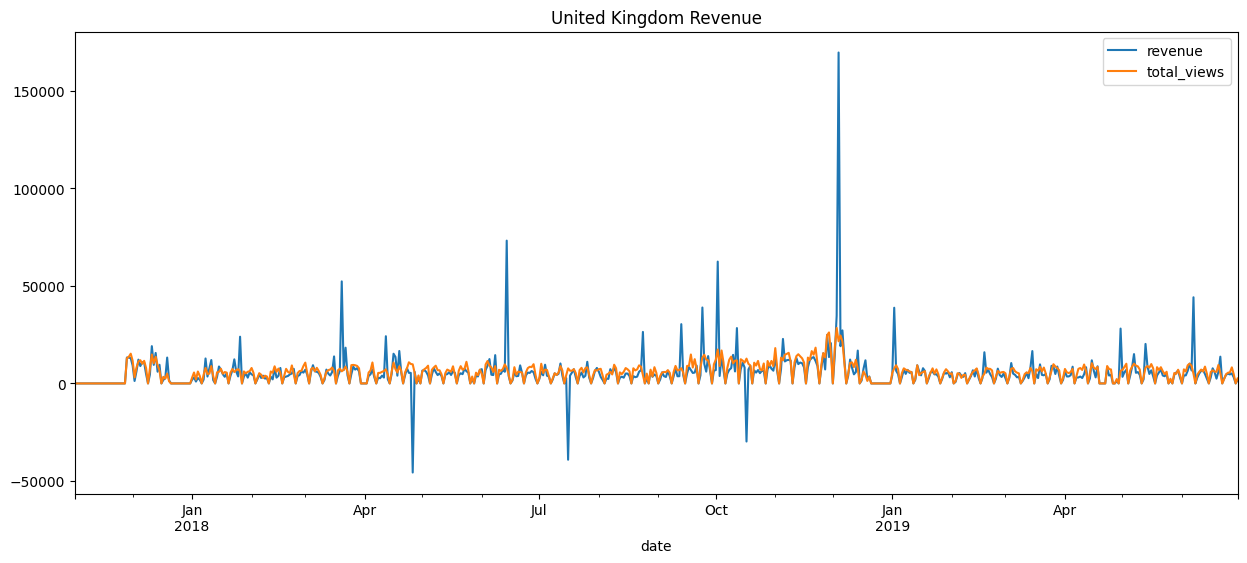

In [92]:
fig, axs = plt.subplots(figsize=(15,6))
ts_uk.plot(x='date', y='revenue', ax=axs)
ts_uk.plot(x='date', y='total_views', ax=axs)
axs.set_title("United Kingdom Revenue")

Text(0.5, 1.0, 'EIRE Revenue')

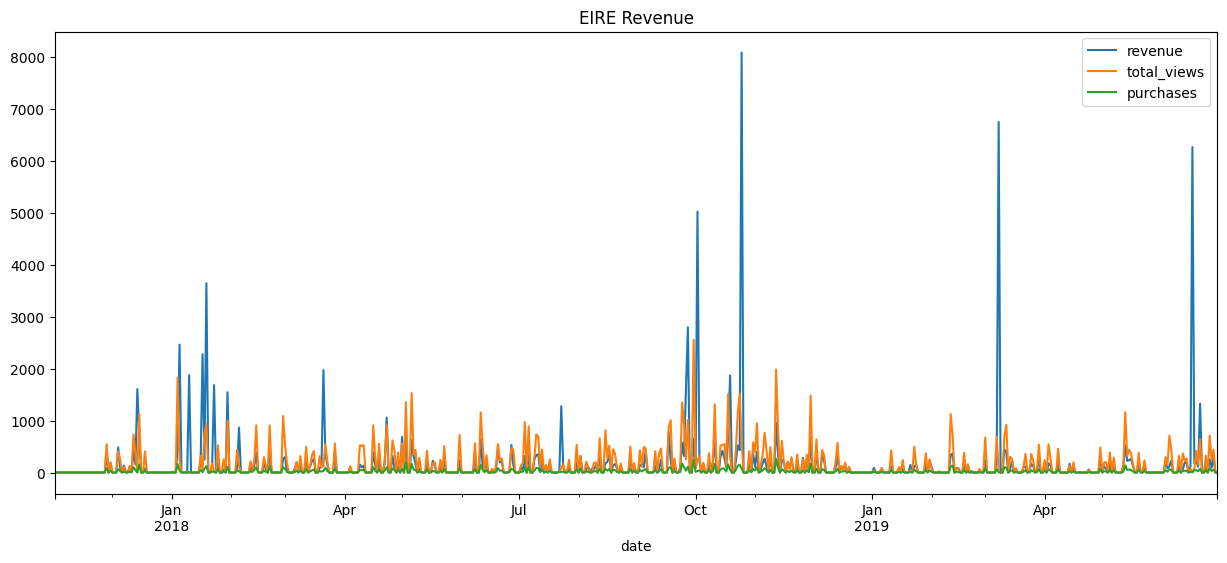

In [95]:
ts_eire = convert_to_ts(df[df.country == 'EIRE'])
fig, axs = plt.subplots(figsize=(15,6))
ts_eire.plot(x='date', y='revenue', ax=axs)
ts_eire.plot(x='date', y='total_views', ax=axs)
ts_eire.plot(x='date', y='purchases', ax=axs)
axs.set_title("EIRE Revenue")

<AxesSubplot: xlabel='customer_id'>

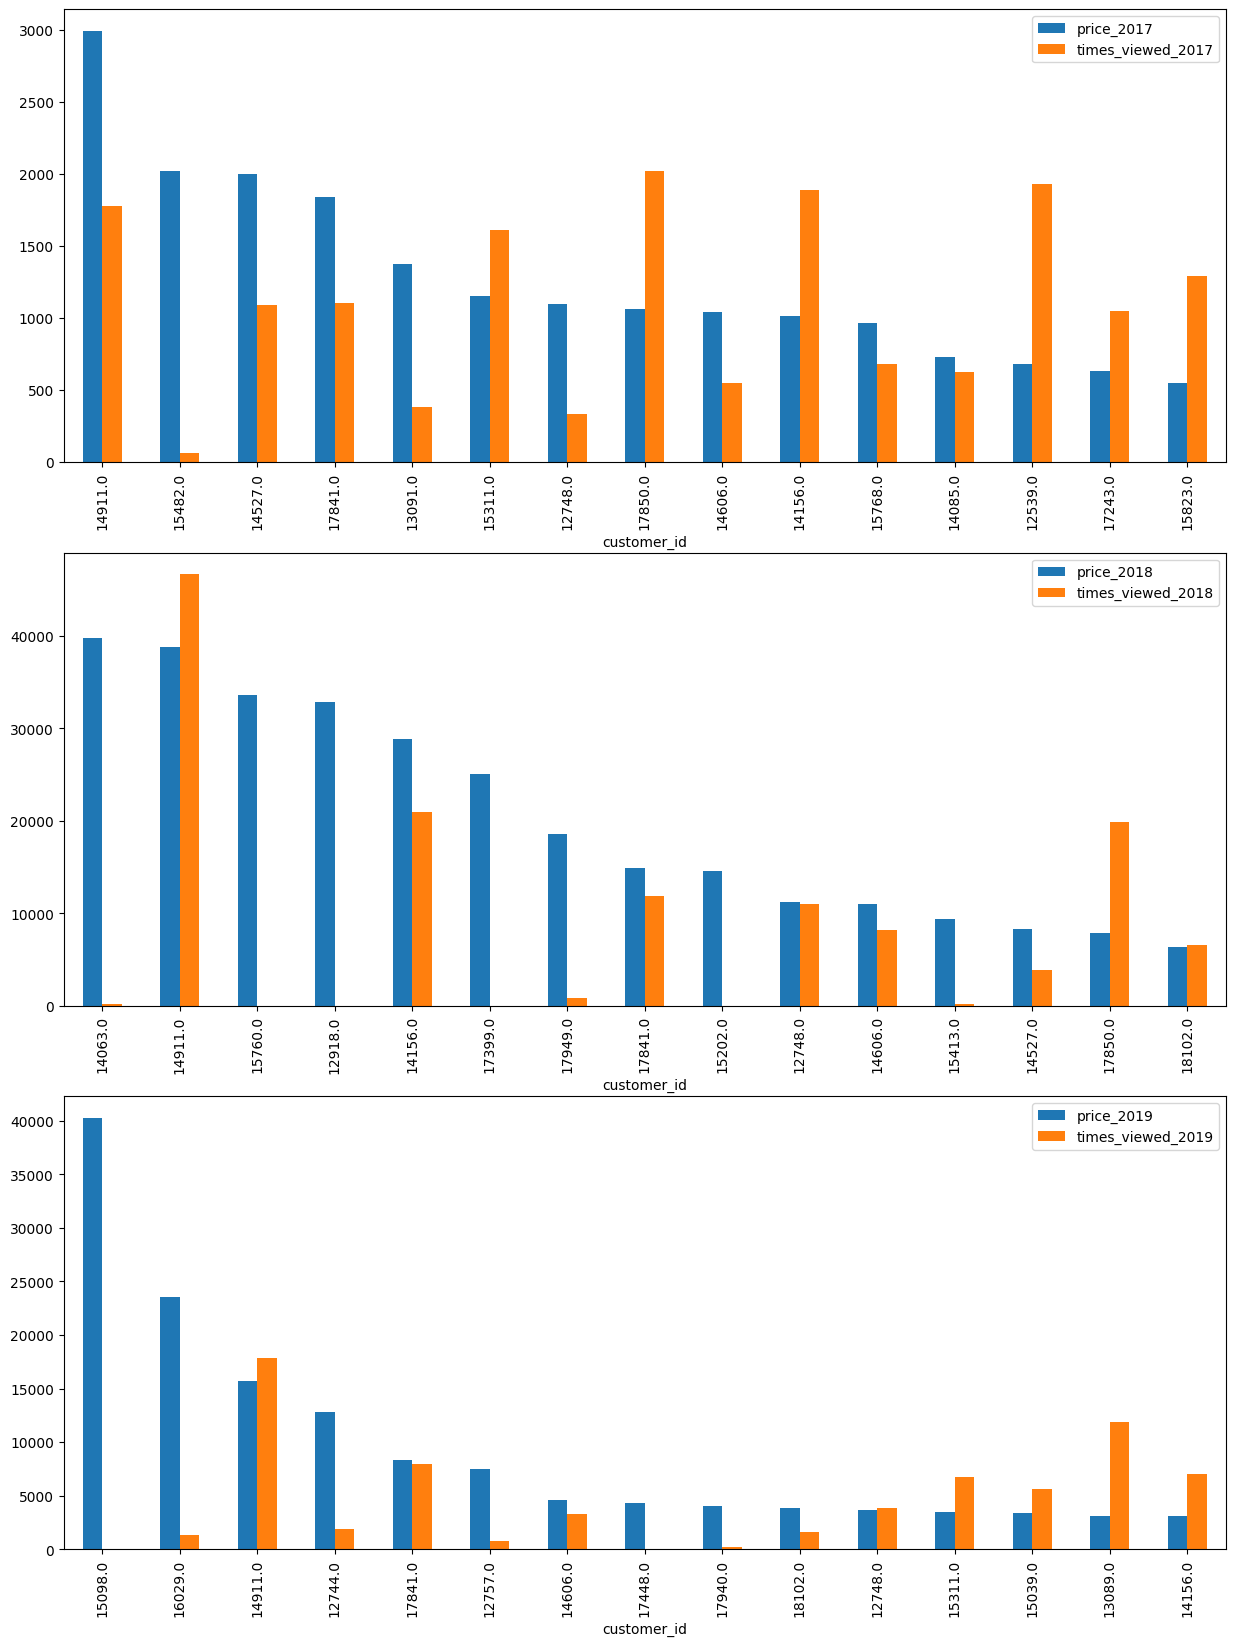

In [86]:
df_s = pd.pivot_table(df, index=['customer_id'], columns=['year'], values=['price', 'times_viewed'], aggfunc='sum')
df_s.columns = ['_'.join([str(j) for j in x]).strip() for x in df_s.columns]
df_s.sort_values(by=['price_2017'], ascending=False, inplace=True)
df_s.head(15)

fig, axs = plt.subplots(3, figsize=(15,20))
df_s[['price_2017', 'times_viewed_2017']].head(15).plot.bar(ax=axs[0])
df_s[['price_2018', 'times_viewed_2018']].sort_values(by=['price_2018'], ascending=False).head(15).plot.bar(ax=axs[1])
df_s[['price_2019', 'times_viewed_2019']].sort_values(by=['price_2019'], ascending=False).head(15).plot.bar(ax=axs[2])

### Part 2: Model Building

In [123]:
from cslib import engineer_features

# Create new features for training
X, y, dates = engineer_features(ts_uk)

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=False)

# Create pipeline
pipe = Pipeline(steps=[("scaler", StandardScaler()),
                 ("clf", LinearRegression())])

# train 
pipe.fit(X_train, y_train)
# evaluate the model
y_pred = pipe.predict(X_test)

In [168]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 34951766970.737854


<AxesSubplot: >

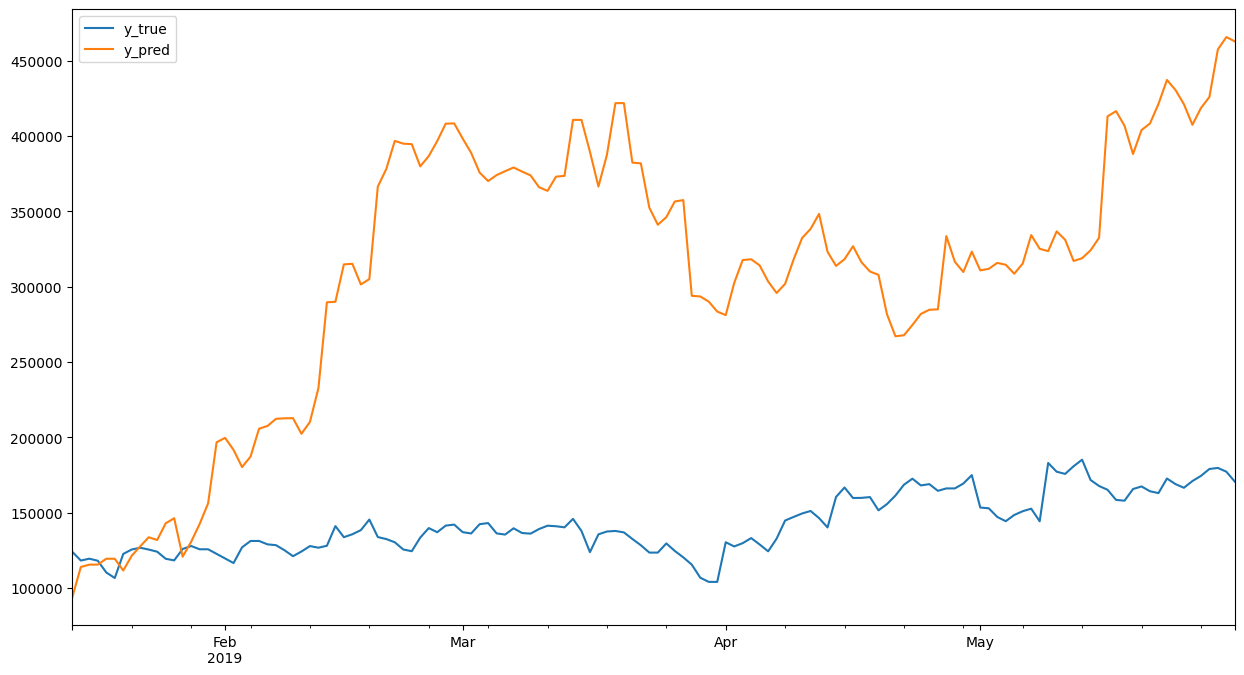

In [169]:
results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}, index = dates[-len(y_test):])

fig, axs = plt.subplots(figsize=(15,8))
results.plot(ax=axs)